In [192]:
# Import packages

# !pip install --user wordcloud 
# %pip install wordcloud

import numpy as np # linear algebra
import pandas as pd # data processing
import json
import matplotlib.pyplot as plt
from math import sqrt, ceil
from timeit import default_timer as timer
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

from wordcloud import WordCloud

In [193]:
# Display full output, not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [194]:
# load data
df_movies = pd.read_csv("tmdb_5000_movies.csv", header='infer', encoding='latin1')
df_credits = pd.read_csv("tmdb_5000_credits.csv", header='infer', encoding='latin1')

In [195]:
# Parse json strings

def get_keywords(indata):
    return '|'.join([x['name'] for x in indata])

def get_director(indata):
    return '|'.join([x['name'] for x in indata if x['job']=='Director'])

def parse_json_movies(df):
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column]=df[column].apply(json.loads)
        df[column] = df[column].apply(get_keywords)

def parse_json_credits(df):
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column]=df[column].apply(json.loads)
    df['director_name'] = df['crew'].apply(get_director)

parse_json_movies(df_movies)
parse_json_credits(df_credits)

In [196]:
# Display the top 5 rows

df_movies.head()
df_credits.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,English|Español,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Français|English|Español|Italiano|Deutsch,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124


,movie_id,title,cast,crew,director_name
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton


In [197]:
# Check data type
df_movies.dtypes
df_credits.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

movie_id          int64
title            object
cast             object
crew             object
director_name    object
dtype: object

In [198]:
# Total number of rows and columns
df_movies.shape
df_credits.shape

(4803, 20)

(4803, 5)

In [199]:
# Find duplicate rows
dup_rows_df = df_movies[df_movies.duplicated()]
dup_rows_df.shape

(0, 20)

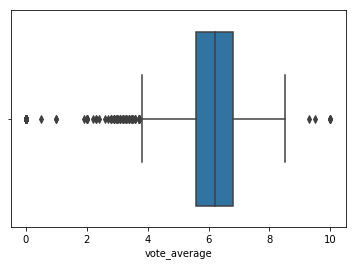

In [200]:
# Detecting outliers
sns.boxplot(x=df_movies['vote_average'])

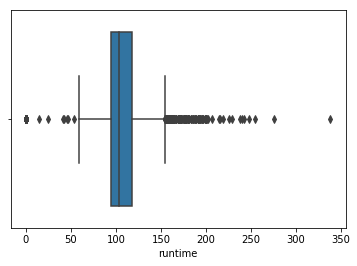

In [201]:
sns.boxplot(x=df_movies['runtime'])

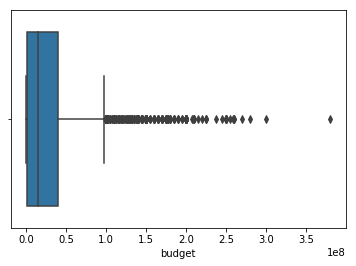

In [202]:
sns.boxplot(x=df_movies['budget'])

In [203]:
# Finding columns with missing values
df_movies.columns[df_movies.isna().any()].tolist()

['homepage', 'overview', 'release_date', 'runtime', 'tagline']

In [204]:
# Finding quantiles
Q1 = df_movies.quantile(0.25)
Q3 = df_movies.quantile(0.75)
IQR_movies = Q3 - Q1
print(IQR_movies)

budget          3.921000e+07
id              4.959600e+04
popularity      2.364543e+01
revenue         9.291719e+07
runtime         2.400000e+01
vote_average    1.200000e+00
vote_count      6.830000e+02
dtype: float64


In [205]:
# Number of rows after removing the outliers
df_movies_2 = df_movies.copy()
df_movies_2 = df_movies[~((df_movies.select_dtypes(include=['floating']) > (Q3+1.5*IQR_movies))|(df_movies.select_dtypes(include=['floating']) < (Q1-1.5*IQR_movies))).any(axis=1)]
df_movies_2.shape

(4239, 20)

Text(0.5, 1.0, 'Number of Movies by Status')

Text(0, 0.5, 'Number of Movies')

Text(0.5, 0, 'Status')

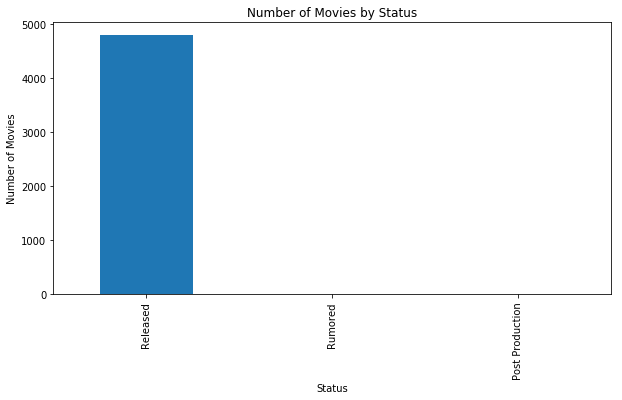

In [206]:
# Plotting variables

# Number of movies broken down by status 
df_movies.status.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of Movies by Status")
plt.ylabel("Number of Movies")
plt.xlabel("Status")

Text(0.5, 1.0, 'Number of Movies by original Language')

Text(0, 0.5, 'Number of Movies')

Text(0.5, 0, 'Original Language')

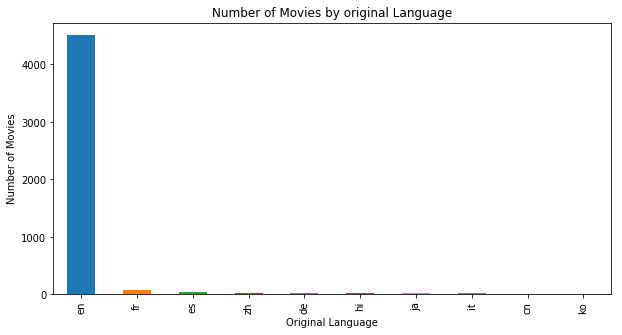

In [207]:
# Number of movies broken down by original language
df_movies.original_language.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of Movies by original Language")
plt.ylabel("Number of Movies")
plt.xlabel("Original Language")

<Figure size 1440x720 with 0 Axes>

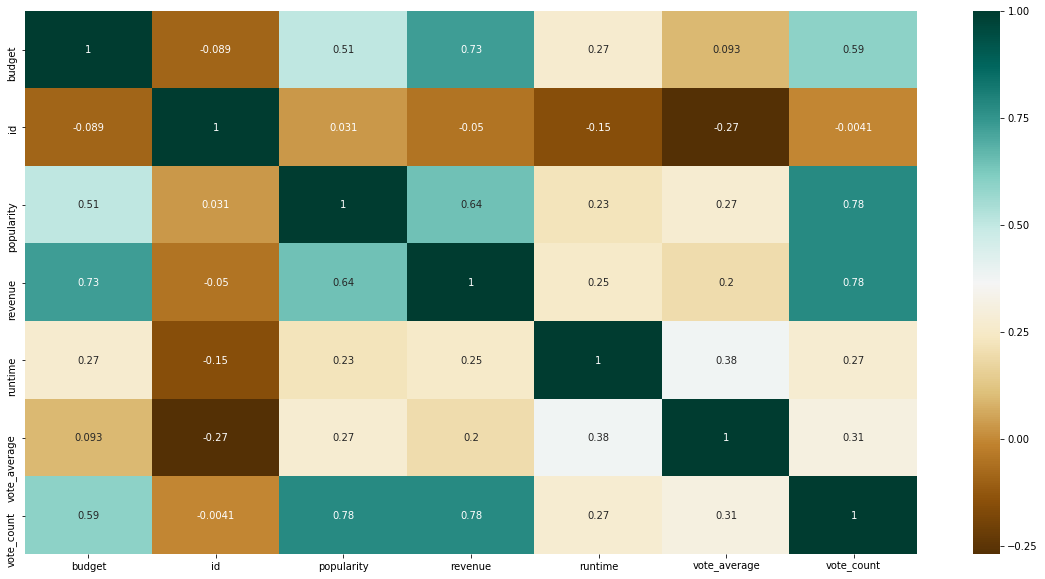

In [208]:
# Correlation heatmap
plt.figure(figsize=(20,10))
c = df_movies.loc[:,:'vote_count'].corr()
sns.heatmap(c, cmap="BrBG", annot=True)

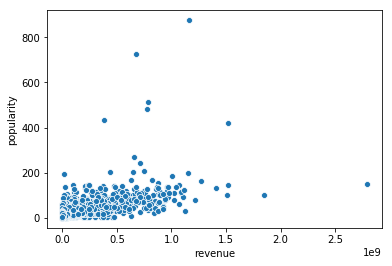

In [209]:
sns.scatterplot(x="revenue", y="popularity", data=df_movies)

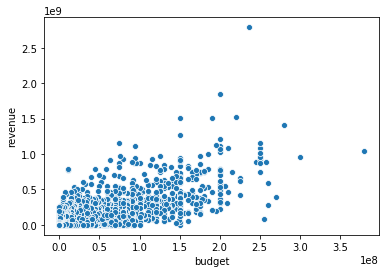

In [210]:
sns.scatterplot(x="budget", y="revenue", data=df_movies)

In [211]:
#Explore movie genres
df_movies['genres'].head()

0    Action|Adventure|Fantasy|Science Fiction
1                    Adventure|Fantasy|Action
2                      Action|Adventure|Crime
3                 Action|Crime|Drama|Thriller
4            Action|Adventure|Science Fiction
Name: genres, dtype: object

In [212]:
#Create binary columns for movie genres
def unique_word_list(column, df):
    all_words=[]
    for i in df[column]:
        split_words=list(map(str, i.split('|')))
        for j in split_words:
            if j not in all_words and j !='':
                all_words.append(j)
    return all_words

genre_list=unique_word_list('genres', df_movies)     
print(genre_list)

for genre in genre_list:
    df_movies[genre] = df_movies['genres'].map(lambda k: 1 if genre in str(k) else 0)

['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']


In [213]:
df_movies.loc[:,'Action':'TV Movie'].head()

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


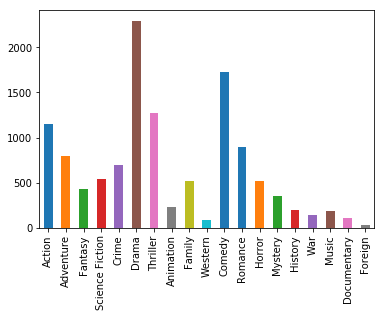

In [214]:
# Plotting the count of movies for each genres
df_movies.loc[:,'Action':'Foreign'].sum().plot(kind='bar')

In [215]:
# Explore plot keywords
def word_list(column, df):
    all_words=[]
    for i in df[column]:
        split_words=list(map(str, i.split('|')))
        for j in split_words:
            if j !='':
                all_words.append(j)
    return all_words

keyword_list=word_list('keywords', df_movies)     

def word_count_list(word_list):
    word_count=[]
    for i in word_list:
        x=word_list.count(i)
        if (i,x) not in word_count:
            word_count.append((i,x))
    return word_count

keyword_count = word_count_list(keyword_list)
# print(keyword_count)

sorted_keywords = sorted(keyword_count, key=lambda x: x[1], reverse=True)
print(sorted_keywords[:15])

[('woman director', 324), ('independent film', 318), ('duringcreditsstinger', 307), ('based on novel', 197), ('murder', 189), ('aftercreditsstinger', 170), ('violence', 150), ('dystopia', 139), ('sport', 126), ('revenge', 118), ('sex', 111), ('friendship', 106), ('musical', 105), ('biography', 105), ('teenager', 99)]


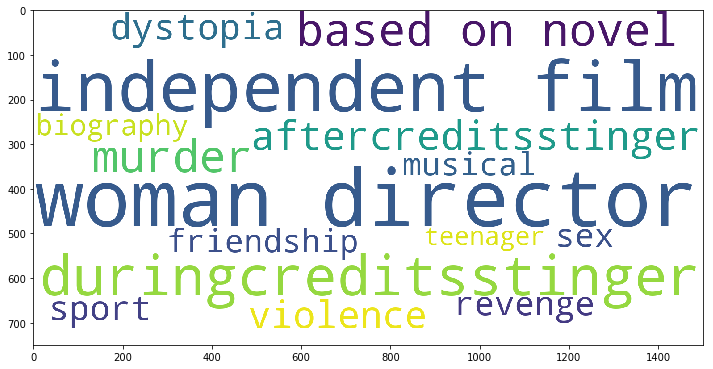

In [216]:
# Create word cloud for keywords
dict_keywords = dict(sorted_keywords[:15])

def make_wordcloud(word_dict, color):
    wordcloud = WordCloud(
                      width=1500,
                      height=750, 
                      background_color=color, 
                      max_words=50,
                      max_font_size=500, 
                      normalize_plurals=False)
    wordcloud.generate_from_frequencies(word_dict)
    fig = plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    
make_wordcloud(dict_keywords,"white")

[('Steven Spielberg', 27), ('Woody Allen', 22), ('Martin Scorsese', 21), ('Clint Eastwood', 20), ('Robert Rodriguez', 17), ('Ridley Scott', 16), ('Spike Lee', 16), ('Steven Soderbergh', 15), ('Renny Harlin', 15), ('Tim Burton', 14), ('Oliver Stone', 14), ('Robert Zemeckis', 13), ('Ron Howard', 13), ('Joel Schumacher', 13), ('Barry Levinson', 13)]


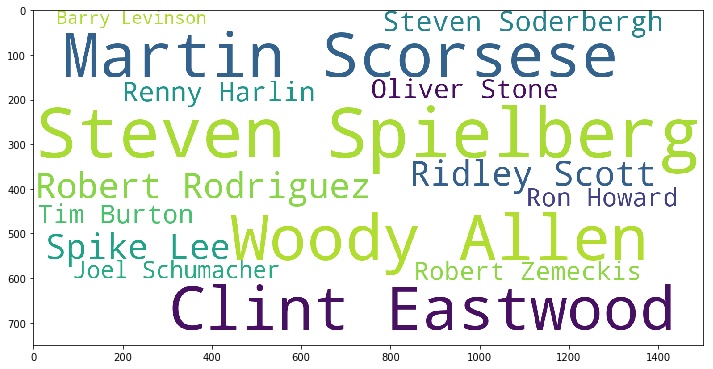

In [217]:
# Create word cloud for director names
director_list=word_list('director_name', df_credits)     
director_count = word_count_list(director_list)
# print(keyword_count)

sorted_directors = sorted(director_count, key=lambda x: x[1], reverse=True)
print(sorted_directors[:15])

dict_directors = dict(sorted_directors[:15])
make_wordcloud(dict_directors,"white")